In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 10)

from nbeats import ModelNBEATS

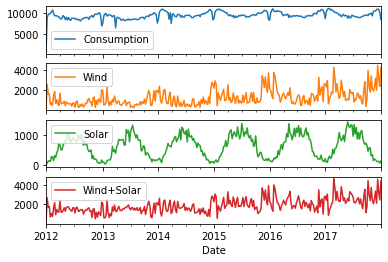

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv', sep=',', index_col=0, parse_dates=[0]).dropna().resample('W-SUN').sum()
df.plot(subplots=True);

In [3]:
# split data into train/test periods
h = 14                                        # num of periods to forecast
train, test = df.iloc[:-h], df.iloc[-h:]

In [4]:
model = ModelNBEATS(y=train)

model.fit()

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.0415
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 0.9750
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 0.9049
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 0.8366
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 0.7664
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6952
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6184
Epoch 8/100
1/1 [==============================] - 0s 38ms/step - loss: 0.5387
Epoch 9/100
1/1 [==============================] - 0s 38ms/step - loss: 0.4588
Epoch 10/100
1/1 [==============================] - 0s 52ms/step - loss: 0.3777
Epoch 11/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2972
Epoch 12/100
1/1 [==============================] - 0s 40ms/step - loss: 0.2224
Epoch 13/100
1/1 [==============================] -

In [5]:
pred = model.predict(h)

In [6]:
pred

,Consumption,Wind,Solar,Wind+Solar
2017-10-01,10036,804,229,1028
2017-10-08,10337,641,31,676
2017-10-15,10712,425,0,227
2017-10-22,11178,157,0,0
2017-10-29,11759,0,0,0
2017-11-05,12481,0,0,0
2017-11-12,13381,0,0,0
2017-11-19,14500,0,0,0
2017-11-26,15894,0,0,0
2017-12-03,17629,0,0,0


In [7]:
# specify parameters that you want to change
model = ModelNBEATS(y=train, **{
    'scale_data':False, 
    'num_epoch':200, 
    'stacks':'generic,generic,trend,seasonality', 
    'num_layers':3, 
    'theta_size':df.shape[1], 
    'num_neurons':256,
    'verbose':0})

model.fit()

In [8]:
pred = model.predict(14)

In [9]:
pred

,Consumption,Wind,Solar,Wind+Solar
2017-10-01,9471,719,167,892
2017-10-08,9495,709,164,893
2017-10-15,9515,710,164,895
2017-10-22,9536,711,165,897
2017-10-29,9557,713,165,899
2017-11-05,9577,714,165,901
2017-11-12,9598,716,166,903
2017-11-19,9619,717,166,905
2017-11-26,9640,719,167,907
2017-12-03,9660,721,167,908
